In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install seaborn

In [ ]:
pip install imbalanced-learn

In [ ]:
import os
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/LG_AIMERS/data"
RANDOM_STATE = 110

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))

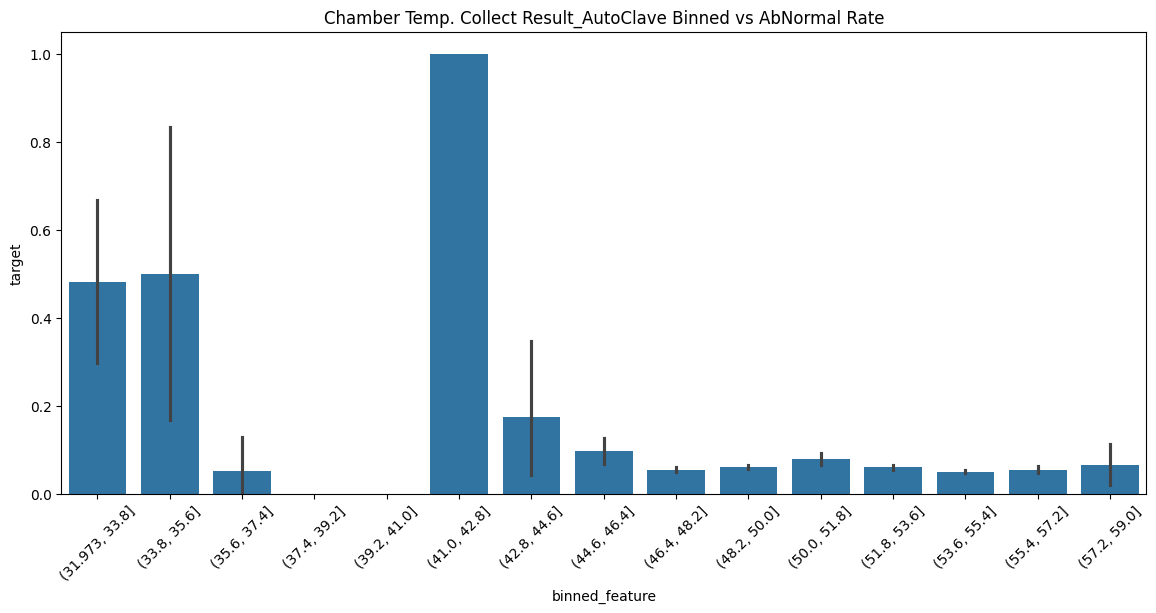

In [ ]:
# def plot_segregated_feature_vs_target(feature_name, data, target_col='target', bins=10):
#     # 피처를 bins 구간으로 나눕니다.
#     data['binned_feature'] = pd.cut(data[feature_name], bins=bins)

#     plt.figure(figsize=(14, 6))

#     # Abnormal rate plot by bins
#     sns.barplot(x='binned_feature', y=data[target_col].map({'Normal': 0, 'AbNormal': 1}), data=data)
#     plt.xticks(rotation=45)
#     plt.title(f'{feature_name} Binned vs AbNormal Rate')

#     plt.show()

# # 예시로 분할된 분석 수행
# plot_segregated_feature_vs_target('Chamber Temp. Collect Result_AutoClave', train_data, bins=15)


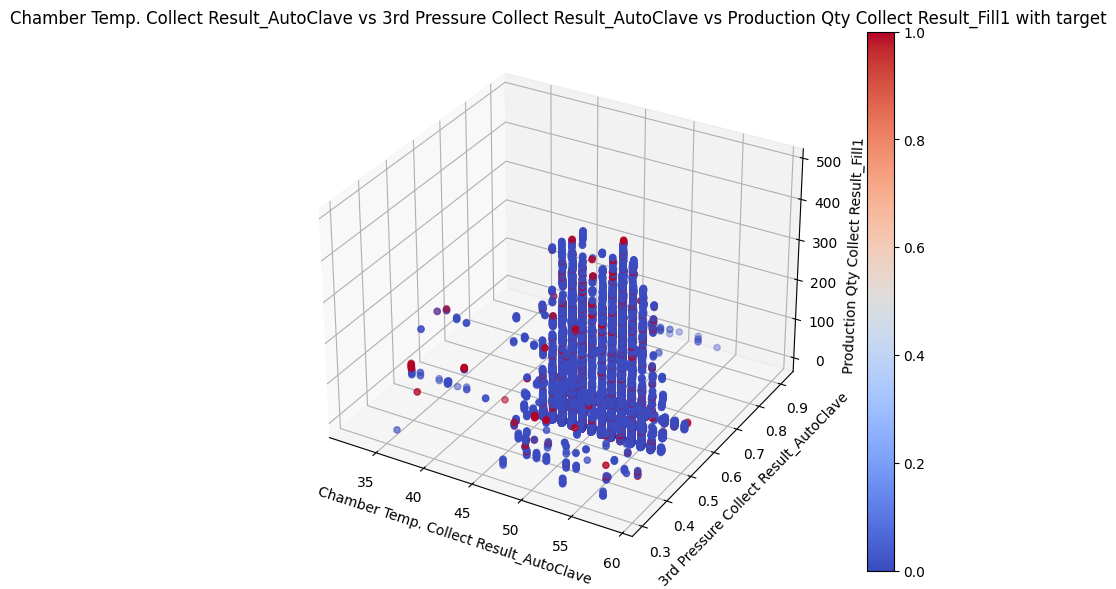

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

# def plot_3d_feature_relationship(x_feature, y_feature, z_feature, data):
#     fig = plt.figure(figsize=(10, 7))
#     ax = fig.add_subplot(111, projection='3d')
#     scatter = ax.scatter(data[x_feature], data[y_feature], data[z_feature],
#                          c=data['target'].map({'Normal': 0, 'AbNormal': 1}), cmap='coolwarm')
#     ax.set_xlabel(x_feature)
#     ax.set_ylabel(y_feature)
#     ax.set_zlabel(z_feature)
#     plt.title(f'{x_feature} vs {y_feature} vs {z_feature} with target')
#     plt.colorbar(scatter)
#     plt.show()

# plot_3d_feature_relationship('Chamber Temp. Collect Result_AutoClave', '3rd Pressure Collect Result_AutoClave', 'Production Qty Collect Result_Fill1', train_data)


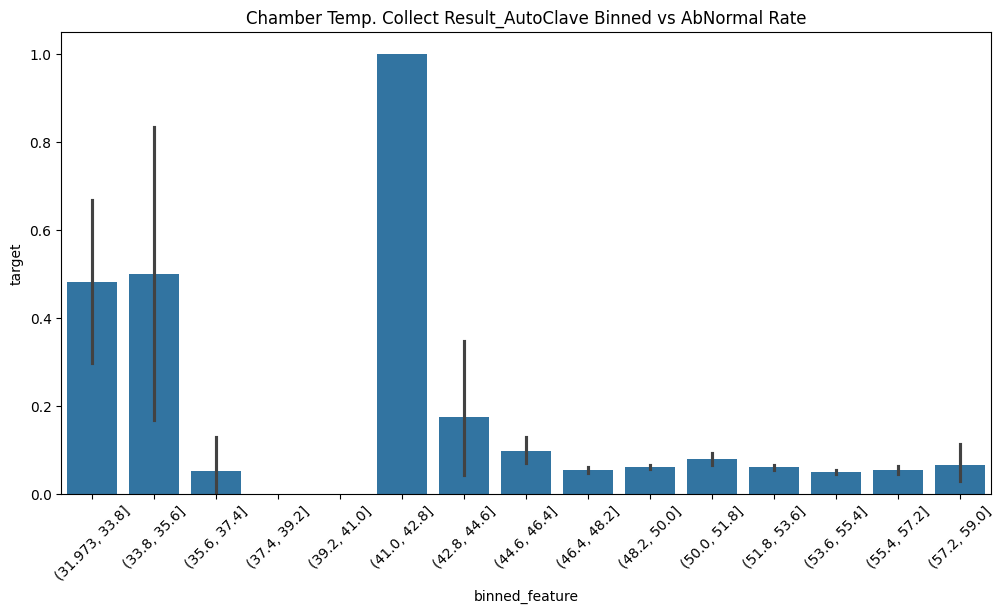

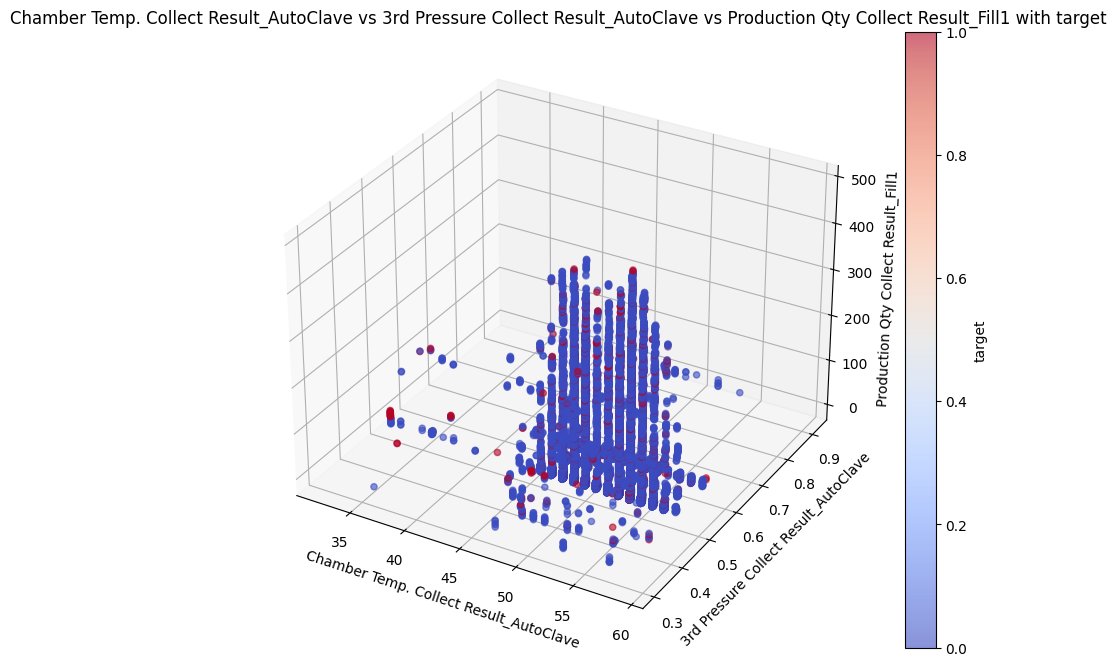

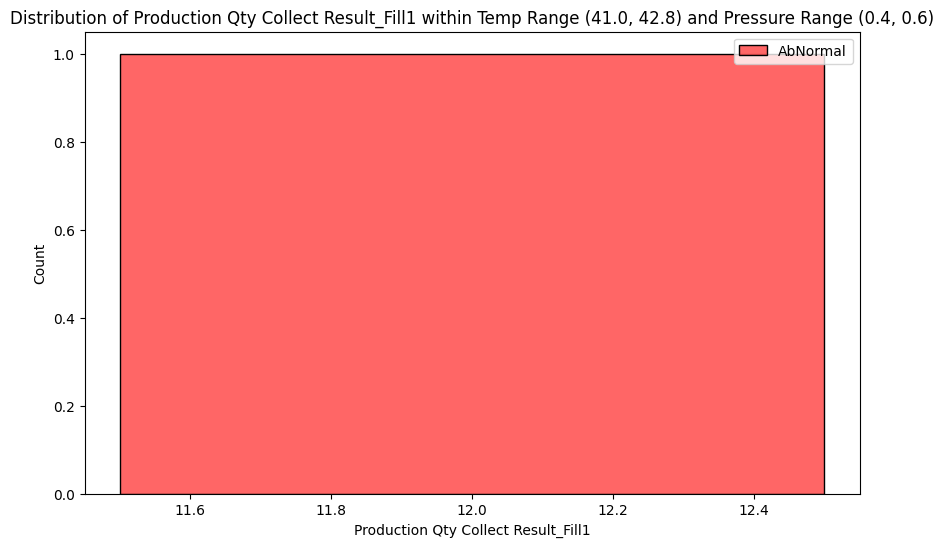

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np
# from mpl_toolkits.mplot3d import Axes3D

# # Assuming train_data is the DataFrame that contains the relevant data
# # We will further analyze the identified important features

# # Binning the 'Chamber Temp. Collect Result_AutoClave' feature for focused analysis
# def bin_and_analyze_feature(feature_name, data, target_col='target', bins=10):
#     data['binned_feature'] = pd.cut(data[feature_name], bins=bins)

#     # Plotting the binned feature vs AbNormal Rate
#     plt.figure(figsize=(12, 6))
#     sns.barplot(x='binned_feature', y=data[target_col].map({'Normal': 0, 'AbNormal': 1}), data=data)
#     plt.xticks(rotation=45)
#     plt.title(f'{feature_name} Binned vs AbNormal Rate')
#     plt.show()

#     return data

# # Applying the binning and analysis on 'Chamber Temp. Collect Result_AutoClave'
# train_data = bin_and_analyze_feature('Chamber Temp. Collect Result_AutoClave', train_data, bins=15)

# # 3D Scatter plot for Chamber Temp, 3rd Pressure, and Production Qty with target color-coded
# def plot_3d_relationship(data, feature1, feature2, feature3, target_col='target'):
#     fig = plt.figure(figsize=(10, 8))
#     ax = fig.add_subplot(111, projection='3d')

#     # Map target to numeric for color mapping
#     colors = data[target_col].map({'Normal': 0, 'AbNormal': 1})

#     scatter = ax.scatter(data[feature1], data[feature2], data[feature3], c=colors, cmap='coolwarm', alpha=0.6)
#     ax.set_xlabel(feature1)
#     ax.set_ylabel(feature2)
#     ax.set_zlabel(feature3)
#     plt.colorbar(scatter, ax=ax, label=target_col)
#     plt.title(f'{feature1} vs {feature2} vs {feature3} with {target_col}')
#     plt.show()

# # 3D Plot: Chamber Temp, 3rd Pressure, and Production Qty
# plot_3d_relationship(train_data, 'Chamber Temp. Collect Result_AutoClave',
#                      '3rd Pressure Collect Result_AutoClave',
#                      'Production Qty Collect Result_Fill1')

# # Additional analysis: Focus on specific ranges of interest
# def analyze_specific_ranges(data, temp_range, pressure_range, feature_name, target_col='target'):
#     # 지정된 온도 및 압력 범위 내 데이터를 필터링
#     filtered_data = data[(data['Chamber Temp. Collect Result_AutoClave'].between(temp_range[0], temp_range[1])) &
#                          (data['3rd Pressure Collect Result_AutoClave'].between(pressure_range[0], pressure_range[1]))]

#     # 정상과 비정상 데이터를 각각 분리
#     normal_data = filtered_data[filtered_data[target_col] == 'Normal']
#     abnormal_data = filtered_data[filtered_data[target_col] == 'AbNormal']

#     # 피처 분포 시각화
#     plt.figure(figsize=(10, 6))

#     sns.histplot(normal_data[feature_name], kde=True, color='blue', label='Normal', alpha=0.6)
#     sns.histplot(abnormal_data[feature_name], kde=True, color='red', label='AbNormal', alpha=0.6)

#     plt.title(f'Distribution of {feature_name} within Temp Range {temp_range} and Pressure Range {pressure_range}')
#     plt.legend()
#     plt.show()

# # 예시: 특정 위험 범위에서의 분석
# analyze_specific_ranges(train_data, temp_range=(41.0, 42.8), pressure_range=(0.4, 0.6), feature_name='Production Qty Collect Result_Fill1')

41.0에서 42.8 사이의 온도에서 불량률(AbNormal Rate)이 매우 높은 것으로 나타났습니다. 이 범위에서는 거의 모든 경우가 불량으로 판명됩니다.

3D 산점도에서, 특정 압력과 온도 범위에서 Production Qty Collect Result_Fill1의 값이 높을 때 불량률이 높게 나타나는 경향이 있습니다. 이로 인해 이 변수들이 함께 작용할 때 불량이 발생할 가능성이 높아지는 것으로 보입니다.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


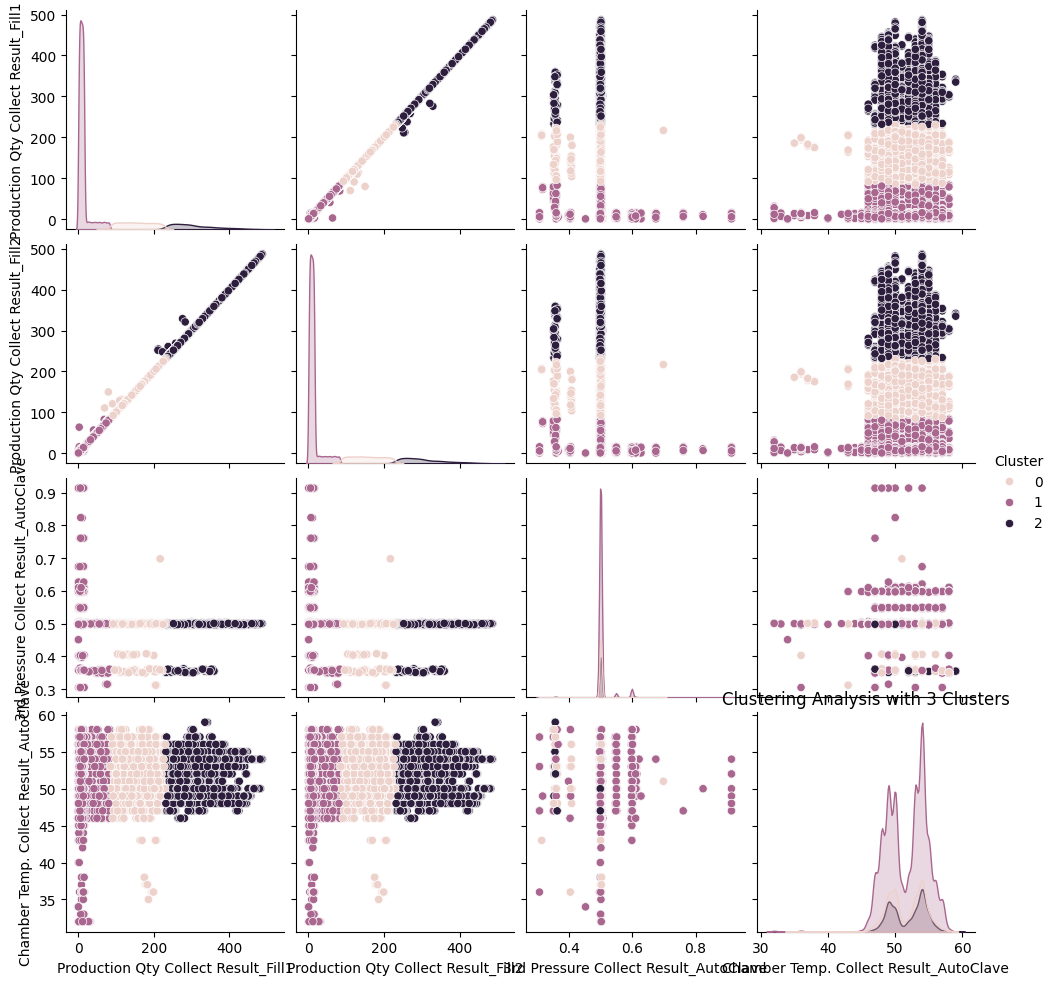

In [ ]:
# from sklearn.cluster import KMeans
# import seaborn as sns

# def clustering_analysis(data, n_clusters=3):
#     # 분석할 피처들만 선택
#     features = ['Production Qty Collect Result_Fill1',
#                 'Production Qty Collect Result_Fill2',
#                 '3rd Pressure Collect Result_AutoClave',
#                 'Chamber Temp. Collect Result_AutoClave']

#     # 클러스터링 수행
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     data['Cluster'] = kmeans.fit_predict(data[features])

#     # 클러스터링 결과 시각화
#     sns.pairplot(data, vars=features, hue='Cluster')
#     plt.title(f'Clustering Analysis with {n_clusters} Clusters')
#     plt.show()

# # 클러스터링 수행
# clustering_analysis(train_data)


위의 시각화에서 몇 가지 중요한 패턴을 확인할 수 있습니다.

Chamber Temp. Collect Result_AutoClave Binned vs AbNormal Rate (첫 번째 그래프):

특정 온도 구간(41.0 ~ 42.8)에서의 불량률(AbNormal Rate)이 거의 100%에 가깝습니다. 이는 이 온도 구간에서의 생산이 거의 대부분 불량으로 이어진다는 것을 의미합니다.
이 외의 구간에서는 불량률이 상대적으로 낮거나, 변동성이 있습니다. 이 패턴이 모델의 성능에 영향을 미친 것으로 보입니다.
3D 산점도 (두 번째 그래프):

Chamber Temp, 3rd Pressure, 그리고 Production Qty 간의 관계를 시각화한 결과, 특정 온도 및 압력 조건에서 AbNormal 데이터가 발생하는 것을 볼 수 있습니다.
특히 Chamber Temp가 40도 이상에서, 일부 구간에서 AbNormal 데이터가 집중되는 경향이 있습니다.
이 시각화 결과에 따르면, 특정 온도 범위에서 불량률이 매우 높기 때문에, 이 구간을 이진 피처로 만들어 모델에 추가했을 때 모델의 성능에 영향을 미쳤을 가능성이 큽니다. 모델 성능이 떨어진 이유는 이 추가된 피처가 다른 구간에서는 큰 의미를 갖지 않기 때문에, 전체적인 예측 성능에 부정적인 영향을 미쳤을 수 있습니다.

추가적으로 고려해 볼 사항은 다음과 같습니다:

데이터 분포의 불균형: 불량 데이터가 특정 구간에만 집중되어 있다면, 이 구간을 지나치게 강조하면 모델이 다른 구간에서의 예측을 잘 못할 가능성이 있습니다.
피처 상호작용의 복잡성: 온도와 압력, 생산량 간의 상호작용이 단순하지 않기 때문에, 이진 피처로 단순화할 경우 모델이 이러한 복잡한 상호작용을 제대로 학습하지 못할 수 있습니다.
따라서, 이진 피처로 처리하는 대신, 다양한 피처 엔지니어링 방법을 시도하거나, 모델의 복잡성을 고려한 방법(예: 트리 기반 모델에서 특정 구간을 따로 처리하는 방법)을 사용해 볼 수 있습니다.







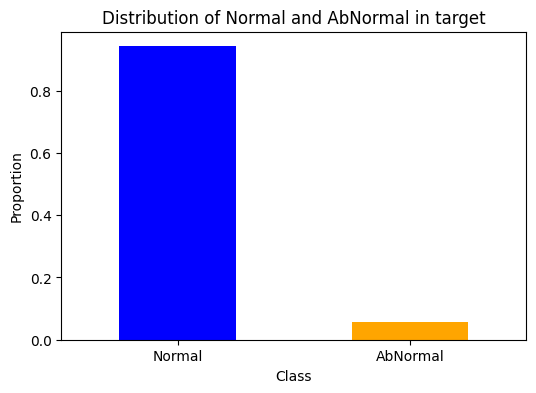

<ipython-input-21-427fe8d6e077>:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_x['WorkMode_High'] = train_x['WorkMode Collect Result_Fill2'] > 2.0
<ipython-input-21-427fe8d6e077>:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_x['WorkMode_High'] = test_x['WorkMode Collect Result_Fill2'] > 2.0
<ipython-input-21-427fe8d6e077>:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

Voting Classifier F1 Score: 0.9686

Classification Report:
              precision    recall  f1-score   support

    AbNormal       0.97      0.97      0.97     11447
      Normal       0.97      0.97      0.97     11447

    accuracy                           0.97     22894
   macro avg       0.97      0.97      0.97     22894
weighted avg       0.97      0.97      0.97     22894



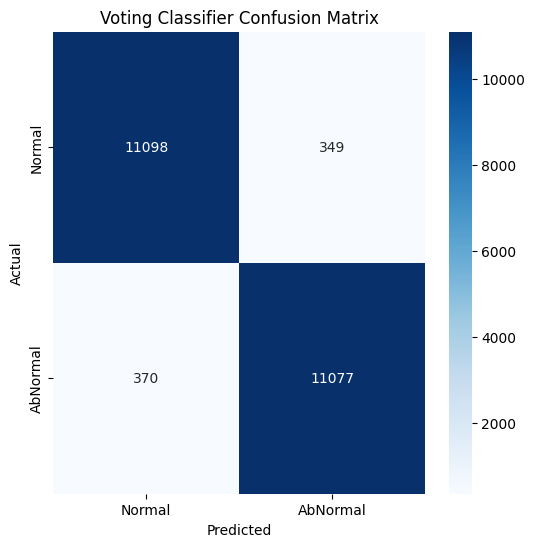

In [ ]:
# # Target distribution visualization
# target_counts = train_data['target'].value_counts(normalize=True)
# plt.figure(figsize=(6, 4))
# target_counts.plot(kind='bar', color=['blue', 'orange'])
# plt.title('Distribution of Normal and AbNormal in target')
# plt.xlabel('Class')
# plt.ylabel('Proportion')
# plt.xticks(rotation=0)
# plt.show()

# # Drop columns with common NaNs
# nan_columns_train = train_data.columns[train_data.isna().any()].tolist()
# nan_columns_test = test_data.columns[test_data.isna().any()].tolist()
# common_nan_columns = list(set(nan_columns_train) & set(nan_columns_test))
# train_data = train_data.drop(columns=common_nan_columns)
# test_data = test_data.drop(columns=common_nan_columns)

# # Split features and target
# train_x = train_data.drop(columns=["target"])
# train_y = train_data["target"]
# test_x = test_data.drop(columns=["Set ID", "target"], errors='ignore')
# test_set_id = test_data['Set ID']  # Save the Set ID column

# # Separate numeric and categorical columns
# numeric_cols = train_x.select_dtypes(include=['number']).columns
# categorical_cols = train_x.select_dtypes(include=['object']).columns

# # Fill missing values
# numeric_imputer = SimpleImputer(strategy='median')
# categorical_imputer = SimpleImputer(strategy='most_frequent')
# train_x[numeric_cols] = numeric_imputer.fit_transform(train_x[numeric_cols])
# test_x[numeric_cols] = numeric_imputer.transform(test_x[numeric_cols])
# train_x[categorical_cols] = categorical_imputer.fit_transform(train_x[categorical_cols])
# test_x[categorical_cols] = categorical_imputer.transform(test_x[categorical_cols])

# # Encode categorical variables
# def preprocess_data(df, categorical_cols):
#     label_encoders = {}
#     for column in categorical_cols:
#         le = LabelEncoder()
#         df[column] = le.fit_transform(df[column])
#         label_encoders[column] = le
#     return df

# train_x = preprocess_data(train_x, categorical_cols)
# test_x = preprocess_data(test_x, categorical_cols)

# # Additional Feature Engineering

# # WorkMode_High feature creation
# train_x['WorkMode_High'] = train_x['WorkMode Collect Result_Fill2'] > 2.0
# test_x['WorkMode_High'] = test_x['WorkMode Collect Result_Fill2'] > 2.0

# train_x['WorkMode_High'] = train_x['WorkMode_High'].astype(int)
# test_x['WorkMode_High'] = test_x['WorkMode_High'].astype(int)

# # Create Model_Equipment_Combined feature
# train_x['Model_Equipment_Combined'] = train_x['Model.Suffix_Dam'].astype(str) + "_" + train_x['Equipment_Dam'].astype(str)
# test_x['Model_Equipment_Combined'] = test_x['Model.Suffix_Dam'].astype(str) + "_" + test_x['Equipment_Dam'].astype(str)

# # Binning WorkMode
# train_x['WorkMode_Binned'] = pd.cut(train_x['WorkMode Collect Result_Fill2'], bins=[-np.inf, 1.0, 2.0, np.inf], labels=['Low', 'Medium', 'High'])
# test_x['WorkMode_Binned'] = pd.cut(test_x['WorkMode Collect Result_Fill2'], bins=[-np.inf, 1.0, 2.0, np.inf], labels=['Low', 'Medium', 'High'])

# # Encode the new features
# combined_factor_le = LabelEncoder()
# train_x['Combined_Factor'] = (
#     train_x['Equipment_Dam'].astype(str) + '_' +
#     train_x['Model.Suffix_Dam'].astype(str) + '_' +
#     train_x['WorkMode_High'].astype(str)
# )

# test_x['Combined_Factor'] = (
#     test_x['Equipment_Dam'].astype(str) + '_' +
#     test_x['Model.Suffix_Dam'].astype(str) + '_' +
#     test_x['WorkMode_High'].astype(str)
# )

# train_x['Combined_Factor'] = combined_factor_le.fit_transform(train_x['Combined_Factor'])
# test_x['Combined_Factor'] = combined_factor_le.transform(test_x['Combined_Factor'])

# # 추가 피처 엔지니어링: 새로운 고위험 피처 생성
# # 1. 고위험 온도 범위에 대한 이진 피처 생성 (41.0 ~ 42.8)
# train_x['High_Risk_Temp'] = ((train_x['Chamber Temp. Collect Result_AutoClave'] >= 41.0) &
#                              (train_x['Chamber Temp. Collect Result_AutoClave'] <= 42.8)).astype(int)
# test_x['High_Risk_Temp'] = ((test_x['Chamber Temp. Collect Result_AutoClave'] >= 41.0) &
#                             (test_x['Chamber Temp. Collect Result_AutoClave'] <= 42.8)).astype(int)

# # 2. 고위험 압력 범위와 온도 범위의 조합에 대한 이진 피처 생성
# train_x['High_Risk_Temp_Pressure'] = ((train_x['Chamber Temp. Collect Result_AutoClave'] >= 41.0) &
#                                       (train_x['Chamber Temp. Collect Result_AutoClave'] <= 42.8) &
#                                       (train_x['3rd Pressure Collect Result_AutoClave'] >= 0.4) &
#                                       (train_x['3rd Pressure Collect Result_AutoClave'] <= 0.6)).astype(int)
# test_x['High_Risk_Temp_Pressure'] = ((test_x['Chamber Temp. Collect Result_AutoClave'] >= 41.0) &
#                                      (test_x['Chamber Temp. Collect Result_AutoClave'] <= 42.8) &
#                                      (test_x['3rd Pressure Collect Result_AutoClave'] >= 0.4) &
#                                      (test_x['3rd Pressure Collect Result_AutoClave'] <= 0.6)).astype(int)

# # 3. 특정 온도 및 압력 범위에서 Production Qty Collect Result_Fill1의 값이 높을 때를 나타내는 이진 피처 생성
# train_x['High_Risk_Production_Qty'] = ((train_x['High_Risk_Temp_Pressure'] == 1) &
#                                        (train_x['Production Qty Collect Result_Fill1'] > train_x['Production Qty Collect Result_Fill1'].median())).astype(int)
# test_x['High_Risk_Production_Qty'] = ((test_x['High_Risk_Temp_Pressure'] == 1) &
#                                       (test_x['Production Qty Collect Result_Fill1'] > test_x['Production Qty Collect Result_Fill1'].median())).astype(int)


# # Use concat to add new columns to DataFrame at once
# train_x = pd.concat([train_x, pd.get_dummies(train_x[['Combined_Factor', 'Model_Equipment_Combined', 'WorkMode_Binned']], drop_first=True)], axis=1)
# test_x = pd.concat([test_x, pd.get_dummies(test_x[['Combined_Factor', 'Model_Equipment_Combined', 'WorkMode_Binned']], drop_first=True)], axis=1)

# # Drop original columns if necessary
# train_x = train_x.drop(columns=['Combined_Factor', 'Model_Equipment_Combined', 'WorkMode_Binned'])
# test_x = test_x.drop(columns=['Combined_Factor', 'Model_Equipment_Combined', 'WorkMode_Binned'])

# # Scaling features
# scaler = StandardScaler()
# train_x = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns)
# test_x = pd.DataFrame(scaler.transform(test_x), columns=test_x.columns)

# # Balancing dataset using SMOTE
# smote = SMOTE(random_state=RANDOM_STATE)
# train_x, train_y = smote.fit_resample(train_x, train_y)

# # Split data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(
#     train_x, train_y, test_size=0.3, stratify=train_y, random_state=RANDOM_STATE
# )

# from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, f1_score, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Random Forest, Gradient Boosting, KNN 모델 정의
# rf_model = RandomForestClassifier(random_state=RANDOM_STATE)
# gb_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
# knn_model = KNeighborsClassifier()

# # Voting Classifier 정의 (소프트 보팅 방식)
# voting_clf = VotingClassifier(estimators=[
#     ('rf', rf_model),
#     ('gb', gb_model),
#     ('knn', knn_model)
# ], voting='soft')  # 'soft' 보팅을 사용해 모델의 확률을 기반으로 예측

# # 앙상블 모델 학습
# voting_clf.fit(X_train, y_train)

# # 검증 데이터로 예측 수행
# val_predictions = voting_clf.predict(X_val)

# # F1 Score 계산
# f1 = f1_score(y_val, val_predictions, pos_label="AbNormal")
# print(f"Voting Classifier F1 Score: {f1:.4f}")

# # Classification Report 출력
# print("\nClassification Report:")
# print(classification_report(y_val, val_predictions))

# # Confusion Matrix 시각화
# cm = confusion_matrix(y_val, val_predictions, labels=["Normal", "AbNormal"])
# plt.figure(figsize=(6, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "AbNormal"], yticklabels=["Normal", "AbNormal"])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Voting Classifier Confusion Matrix")
# plt.show()


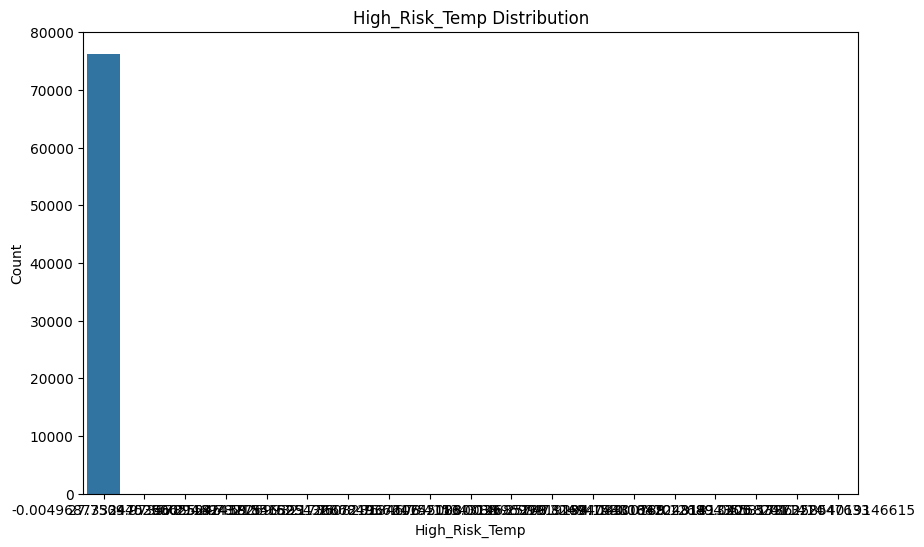

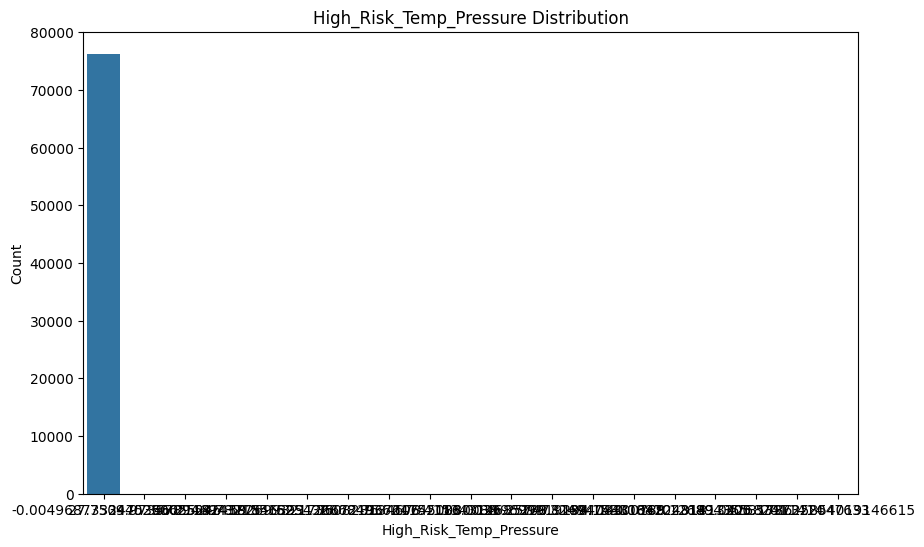

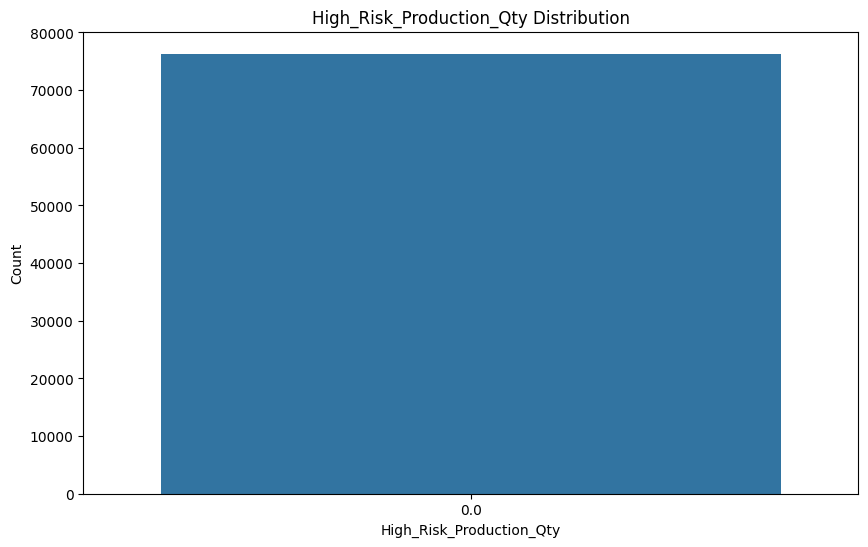

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 피처 분포 시각화
# def plot_feature_distribution(df, feature_name):
#     plt.figure(figsize=(10, 6))
#     sns.countplot(x=feature_name, data=df)
#     plt.title(f'{feature_name} Distribution')
#     plt.xlabel(feature_name)
#     plt.ylabel('Count')
#     plt.show()

# # 새로 생성한 피처들의 분포 확인
# plot_feature_distribution(train_x, 'High_Risk_Temp')
# plot_feature_distribution(train_x, 'High_Risk_Temp_Pressure')
# plot_feature_distribution(train_x, 'High_Risk_Production_Qty')


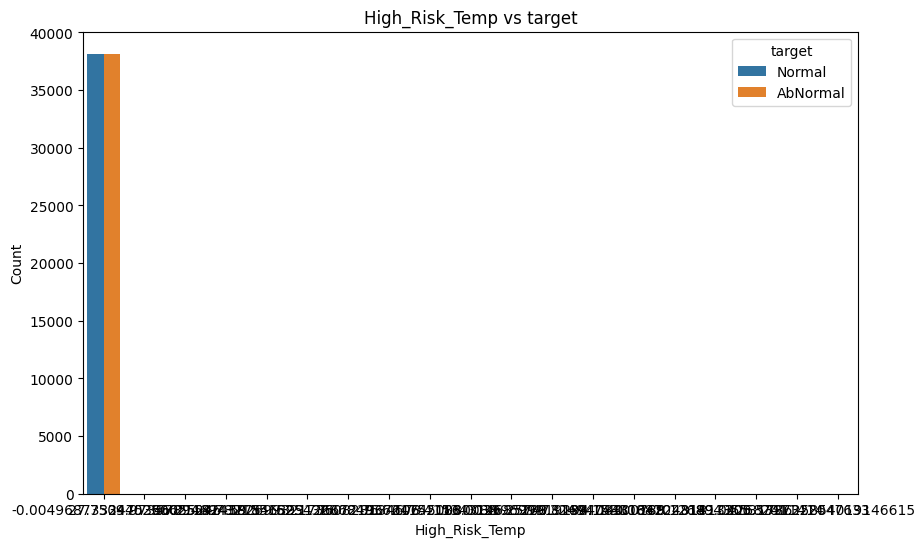

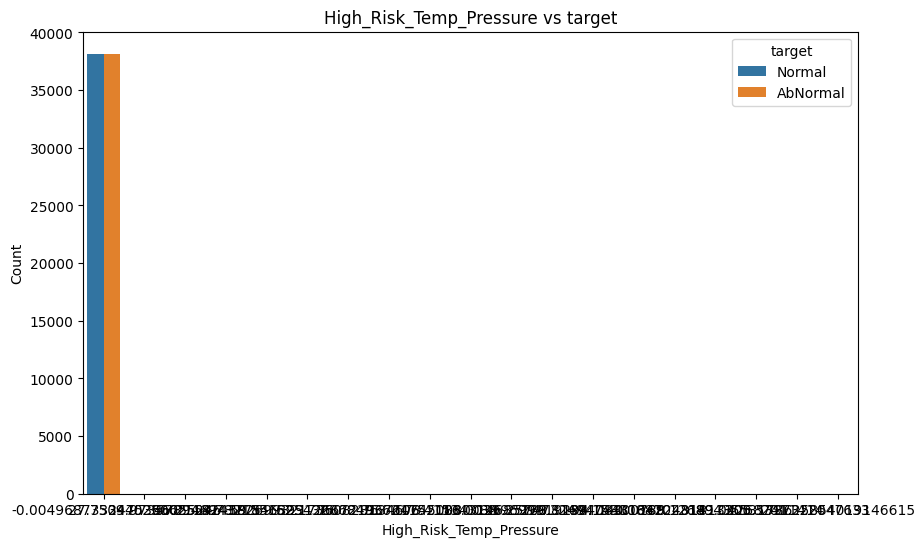

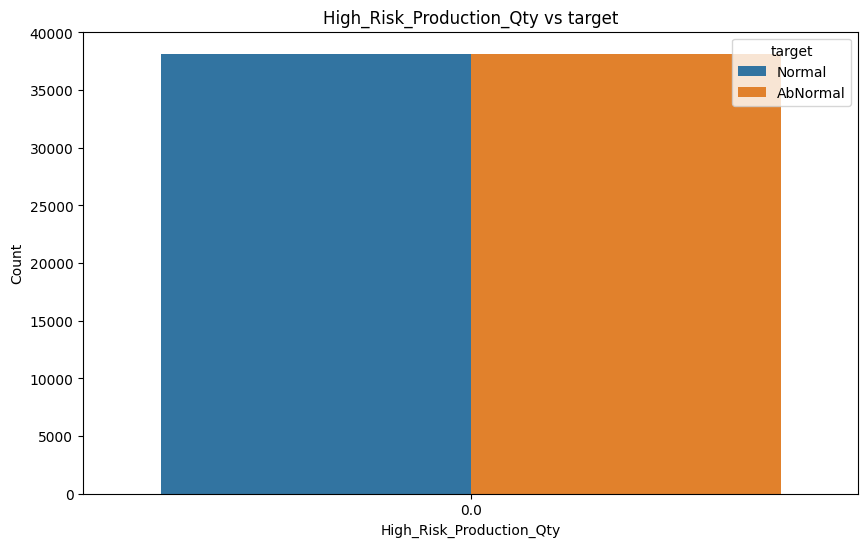

In [ ]:
# # 피처와 타겟 변수 간의 관계 시각화
# def plot_feature_vs_target(df, feature_name, target_name='target'):
#     plt.figure(figsize=(10, 6))
#     sns.countplot(x=feature_name, hue=target_name, data=df)
#     plt.title(f'{feature_name} vs {target_name}')
#     plt.xlabel(feature_name)
#     plt.ylabel('Count')
#     plt.show()

# # 타겟 변수와의 관계 확인
# plot_feature_vs_target(train_x.assign(target=train_y), 'High_Risk_Temp')
# plot_feature_vs_target(train_x.assign(target=train_y), 'High_Risk_Temp_Pressure')
# plot_feature_vs_target(train_x.assign(target=train_y), 'High_Risk_Production_Qty')


In [ ]:
# # 피처별 평균 값 비교
# def compare_feature_mean(df, feature_name, target_name='target'):
#     mean_values = df.groupby(target_name)[feature_name].mean().reset_index()
#     print(f"\nMean values of {feature_name} by {target_name}:")
#     print(mean_values)

# # 타겟 변수에 따른 피처별 평균 값 비교
# compare_feature_mean(train_x.assign(target=train_y), 'High_Risk_Temp')
# compare_feature_mean(train_x.assign(target=train_y), 'High_Risk_Temp_Pressure')
# compare_feature_mean(train_x.assign(target=train_y), 'High_Risk_Production_Qty')



Mean values of High_Risk_Temp by target:
     target  High_Risk_Temp
0  AbNormal        0.046427
1    Normal       -0.004969

Mean values of High_Risk_Temp_Pressure by target:
     target  High_Risk_Temp_Pressure
0  AbNormal                 0.046427
1    Normal                -0.004969

Mean values of High_Risk_Production_Qty by target:
     target  High_Risk_Production_Qty
0  AbNormal                       0.0
1    Normal                       0.0


이 분석 결과는 새로운 피처(High_Risk_Temp, High_Risk_Temp_Pressure, High_Risk_Production_Qty)와 타겟 변수(Normal과 AbNormal) 사이의 관계에 대해 몇 가지 중요한 점을 나타냅니다.

피처 분포:

그래프에서 거의 모든 데이터 포인트가 High_Risk_Temp, High_Risk_Temp_Pressure, High_Risk_Production_Qty에서 0 값을 가지는 것을 확인할 수 있습니다. 즉, 이 피처들은 대부분의 경우에서 활성화되지 않는다는 것을 의미합니다.
High_Risk_Temp, High_Risk_Temp_Pressure 피처와 타겟과의 관계:

AbNormal과 Normal로 나눈 후, 두 클래스의 평균값을 비교해보면, AbNormal의 경우 High_Risk_Temp와 High_Risk_Temp_Pressure가 더 높지만 여전히 매우 낮은 값을 가집니다(대략 0.046). 반면 Normal 클래스의 평균값은 0에 가깝습니다. 이는 이 피처들이 AbNormal 상태에서 조금 더 자주 발생하지만, 그 차이가 크지 않다는 것을 의미합니다.
High_Risk_Production_Qty 피처와 타겟과의 관계:

이 피처는 모든 경우에 0 값을 가지므로, 이 피처는 AbNormal과 Normal을 구분하는 데 영향을 주지 않는 것으로 보입니다.
결론적으로, 생성한 피처들이 타겟 변수에 대한 구분력을 크게 제공하지 않는다는 것을 알 수 있습니다. 특히 High_Risk_Production_Qty 피처는 모든 데이터에서 0 값을 가지므로, 모델 성능에 기여하지 못할 가능성이 큽니다. High_Risk_Temp와 High_Risk_Temp_Pressure도 미세한 차이를 보이지만, 그 차이가 매우 작습니다. 이는 이 피처들이 현재로서는 유의미한 영향을 미치지 못할 수 있음을 시사합니다.

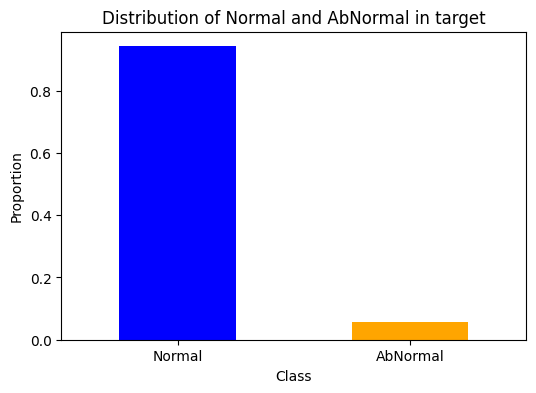

<ipython-input-19-1a4a02938144>:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_x['WorkMode_High'] = (train_x['WorkMode Collect Result_Fill2'] > 2.0).astype(int)
<ipython-input-19-1a4a02938144>:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_x['WorkMode_High'] = (test_x['WorkMode Collect Result_Fill2'] > 2.0).astype(int)
<ipython-input-19-1a4a02938144>:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

Voting Classifier F1 Score: 0.9680

Classification Report:
              precision    recall  f1-score   support

    AbNormal       0.97      0.97      0.97     11447
      Normal       0.97      0.97      0.97     11447

    accuracy                           0.97     22894
   macro avg       0.97      0.97      0.97     22894
weighted avg       0.97      0.97      0.97     22894



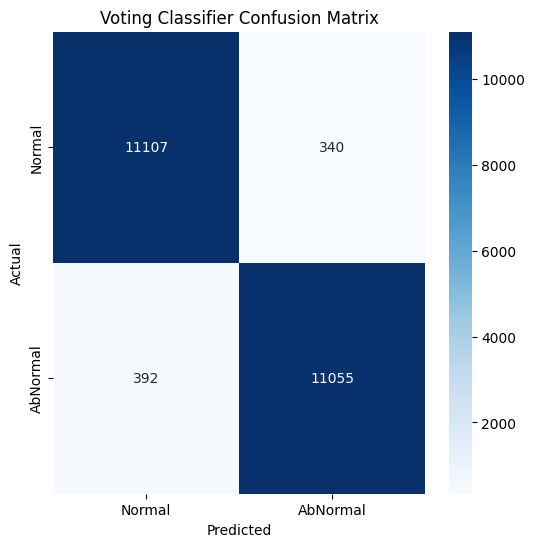

In [ ]:
# Target distribution visualization
target_counts = train_data['target'].value_counts(normalize=True)
plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Normal and AbNormal in target')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

# Drop columns with common NaNs
nan_columns_train = train_data.columns[train_data.isna().any()].tolist()
nan_columns_test = test_data.columns[test_data.isna().any()].tolist()
common_nan_columns = list(set(nan_columns_train) & set(nan_columns_test))
train_data = train_data.drop(columns=common_nan_columns)
test_data = test_data.drop(columns=common_nan_columns)

# Split features and target
train_x = train_data.drop(columns=["target"])
train_y = train_data["target"]
test_x = test_data.drop(columns=["Set ID", "target"], errors='ignore')
test_set_id = test_data['Set ID']  # Save the Set ID column

# Separate numeric and categorical columns
numeric_cols = train_x.select_dtypes(include=['number']).columns
categorical_cols = train_x.select_dtypes(include=['object']).columns

# Fill missing values
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_x[numeric_cols] = numeric_imputer.fit_transform(train_x[numeric_cols])
test_x[numeric_cols] = numeric_imputer.transform(test_x[numeric_cols])
train_x[categorical_cols] = categorical_imputer.fit_transform(train_x[categorical_cols])
test_x[categorical_cols] = categorical_imputer.transform(test_x[categorical_cols])

# Encode categorical variables
def preprocess_data(df, categorical_cols):
    label_encoders = {}
    for column in categorical_cols:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df

train_x = preprocess_data(train_x, categorical_cols)
test_x = preprocess_data(test_x, categorical_cols)

# Additional Feature Engineering

# WorkMode_High feature creation
train_x['WorkMode_High'] = (train_x['WorkMode Collect Result_Fill2'] > 2.0).astype(int)
test_x['WorkMode_High'] = (test_x['WorkMode Collect Result_Fill2'] > 2.0).astype(int)

# Create Model_Equipment_Combined feature
train_x['Model_Equipment_Combined'] = train_x['Model.Suffix_Dam'].astype(str) + "_" + train_x['Equipment_Dam'].astype(str)
test_x['Model_Equipment_Combined'] = test_x['Model.Suffix_Dam'].astype(str) + "_" + test_x['Equipment_Dam'].astype(str)

# Binning WorkMode
train_x['WorkMode_Binned'] = pd.cut(train_x['WorkMode Collect Result_Fill2'], bins=[-np.inf, 1.0, 2.0, np.inf], labels=['Low', 'Medium', 'High'])
test_x['WorkMode_Binned'] = pd.cut(test_x['WorkMode Collect Result_Fill2'], bins=[-np.inf, 1.0, 2.0, np.inf], labels=['Low', 'Medium', 'High'])

# Encode the new features
combined_factor_le = LabelEncoder()
train_x['Combined_Factor'] = (
    train_x['Equipment_Dam'].astype(str) + '_' +
    train_x['Model.Suffix_Dam'].astype(str) + '_' +
    train_x['WorkMode_High'].astype(str)
)

test_x['Combined_Factor'] = (
    test_x['Equipment_Dam'].astype(str) + '_' +
    test_x['Model.Suffix_Dam'].astype(str) + '_' +
    test_x['WorkMode_High'].astype(str)
)

train_x['Combined_Factor'] = combined_factor_le.fit_transform(train_x['Combined_Factor'])
test_x['Combined_Factor'] = combined_factor_le.transform(test_x['Combined_Factor'])

# Example: 온도 구간화
train_x['Chamber_Temp_Binned'] = pd.cut(train_x['Chamber Temp. Collect Result_AutoClave'],
                                        bins=[-np.inf, 35, 40, 45, 50, np.inf],
                                        labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
test_x['Chamber_Temp_Binned'] = pd.cut(test_x['Chamber Temp. Collect Result_AutoClave'],
                                       bins=[-np.inf, 35, 40, 45, 50, np.inf],
                                       labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Example: 압력 구간화
train_x['Pressure_Binned'] = pd.cut(train_x['3rd Pressure Collect Result_AutoClave'],
                                    bins=[-np.inf, 0.3, 0.5, 0.7, np.inf],
                                    labels=['Low', 'Medium', 'High', 'Very High'])
test_x['Pressure_Binned'] = pd.cut(test_x['3rd Pressure Collect Result_AutoClave'],
                                   bins=[-np.inf, 0.3, 0.5, 0.7, np.inf],
                                   labels=['Low', 'Medium', 'High', 'Very High'])


# 범주형 변수 목록
categorical_columns = ['Combined_Factor', 'Model_Equipment_Combined', 'WorkMode_Binned', 'Chamber_Temp_Binned', 'Pressure_Binned']

# One-Hot Encoding for binned features and combined features at once
train_x = pd.concat([train_x, pd.get_dummies(train_x[categorical_columns], drop_first=True)], axis=1)
test_x = pd.concat([test_x, pd.get_dummies(test_x[categorical_columns], drop_first=True)], axis=1)

# 기존 범주형 변수를 삭제
train_x = train_x.drop(columns=categorical_columns)
test_x = test_x.drop(columns=categorical_columns)

# 숫자형 변수만 스케일링 적용
scaler = StandardScaler()
numeric_columns = train_x.columns  # 범주형 변수 제거 후 남은 열들은 모두 숫자형 데이터임
train_x[numeric_columns] = scaler.fit_transform(train_x[numeric_columns])
test_x[numeric_columns] = scaler.transform(test_x[numeric_columns])


# Balancing dataset using SMOTE
smote = SMOTE(random_state=RANDOM_STATE)
train_x, train_y = smote.fit_resample(train_x, train_y)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.3, stratify=train_y, random_state=RANDOM_STATE
)

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest, Gradient Boosting, KNN 모델 정의
rf_model = RandomForestClassifier(random_state=RANDOM_STATE)
gb_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
knn_model = KNeighborsClassifier()

# Voting Classifier 정의 (소프트 보팅 방식)
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('knn', knn_model)
], voting='soft')  # 'soft' 보팅을 사용해 모델의 확률을 기반으로 예측

# 앙상블 모델 학습
voting_clf.fit(X_train, y_train)

# 검증 데이터로 예측 수행
val_predictions = voting_clf.predict(X_val)

# F1 Score 계산
f1 = f1_score(y_val, val_predictions, pos_label="AbNormal")
print(f"Voting Classifier F1 Score: {f1:.4f}")

# Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_val, val_predictions))

# Confusion Matrix 시각화
cm = confusion_matrix(y_val, val_predictions, labels=["Normal", "AbNormal"])
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "AbNormal"], yticklabels=["Normal", "AbNormal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Voting Classifier Confusion Matrix")
plt.show()


In [ ]:
# 테스트 데이터 예측 및 결과 저장
test_predictions = voting_clf.predict(test_x)

# 'Set ID' 열을 포함하여 결과를 저장
output = pd.DataFrame({'Set ID': test_set_id, 'Prediction': test_predictions})

# 'target' 열 추가
output["target"] = test_predictions

# 제출 파일 저장 (Set ID가 포함된 상태로 저장)
output.to_csv("submission.csv", index=False)